In [158]:
import numpy as np
import xarray as xr
from kalman_reconstruction import pipeline
from kalman_reconstruction import example_models
from kalman_reconstruction.statistics import (
    coverage,
    xarray_coverage_prob,
    xarray_RMSE,
)
from kalman_reconstruction.custom_plot import (
    plot_state_with_probability,
    set_custom_rcParams,
)
import matplotlib.pyplot as plt

set_custom_rcParams()
plt.rcParams["figure.figsize"] = (8, 5)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [159]:
from importlib import reload
from kalman_reconstruction import statistics
reload(statistics)
reload(pipeline)

<module 'kalman_reconstruction.pipeline' from 'C:\\Users\\Niebaum\\Documents\\Repositories\\kalman-reconstruction-partially-observered-systems\\kalman_reconstruction\\pipeline.py'>

In [160]:
seed = 39264
variance = 5
nb_iter_SEM = 30
dt = 0.01
number_loops = 3
forcast_duration = 0.5
forecast_length= int(forcast_duration/dt)

sigma = 10

start_times = np.arange(10 *dt, number_loops, 2*forcast_duration)
model_result = example_models.Lorenz_63_xarray(
    dt=dt, time_length=number_loops, time_steps=None
)


rng1 = np.random.default_rng(seed=seed)
rng2 = np.random.default_rng(seed=seed + 1)
rng3 = np.random.default_rng(seed=seed + 2)
rng4 = np.random.default_rng(seed=seed + 3)

In [161]:
data_train = dict()
kalman_train = dict()
names = [
    "$x = [x_2, x_3]$",
    "$x = [x_2, x_3, z_1]$",
    "$x = [x_2, x_3, z_1, z_2]$",
    # "$x = [x_2, x_3, z_1, z_2, z_3]$",
]

### Apply the Kalman SEM using latent variables 


#### 0 latent variables

100%|██████████| 30/30 [00:39<00:00,  1.31s/it]


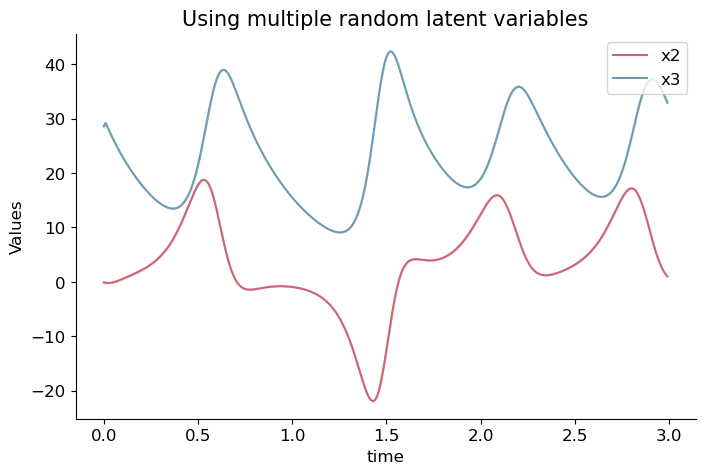

In [162]:
new_name = names[0]

data_train[new_name] = model_result.copy()
# Run Klman_SEM
kalman_train[new_name] = pipeline.xarray_Kalman_SEM_time_dependent(
    ds=data_train[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001,
    sigma = 1e15
)

fig, ax = plt.subplots(1, 1)
for var in kalman_train[new_name].state_name:
    plot_state_with_probability(
        ax=ax,
        x_value=kalman_train[new_name].time,
        state=kalman_train[new_name].states.sel(state_name=var),
        prob=kalman_train[new_name].covariance.sel(state_name=var, state_name_copy=var),
        line_kwargs={"label": var.values},
    )

ax.legend()
# ax.set_xlim((0, 2))
ax.set_xlabel("time")
ax.set_ylabel("Values")
ax.set_title("Using multiple random latent variables");

#### 1 latent variables

100%|██████████| 30/30 [01:00<00:00,  2.02s/it]


Text(0.5, 1.0, 'Using multiple random latent variables')

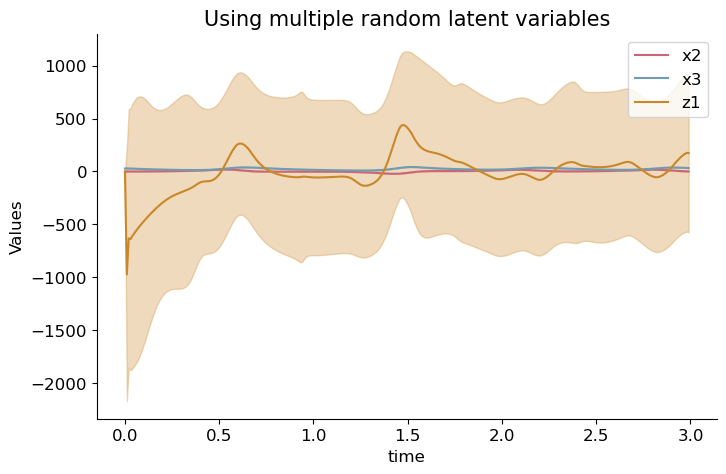

In [163]:
old_name = names[0]
new_name = names[1]

data_train[new_name] = data_train[old_name].copy()
# Add latent variable
pipeline.add_random_variable(
    data_train[new_name], var_name="z1", random_generator=rng1, variance=variance
)
# Run Klman_SEM
kalman_train[new_name] = pipeline.xarray_Kalman_SEM_time_dependent(
    ds=data_train[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3", "z1"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001,
    sigma = sigma
)

fig, ax = plt.subplots(1, 1)
for var in kalman_train[new_name].state_name:
    plot_state_with_probability(
        ax=ax,
        x_value=kalman_train[new_name].time,
        state=kalman_train[new_name].states.sel(state_name=var),
        prob=kalman_train[new_name].covariance.sel(state_name=var, state_name_copy=var),
        line_kwargs={"label": var.values},
    )

ax.legend()
# ax.set_xlim((0, 2))
ax.set_xlabel("time")
ax.set_ylabel("Values")
ax.set_title("Using multiple random latent variables")

#### 2 latent variables

 57%|█████▋    | 17/30 [00:30<00:21,  1.62s/it]C:\Users\Niebaum\Documents\Repositories\kalman-reconstruction-partially-observered-systems\kalman_reconstruction\kalman_time_dependent.py:333: RuntimeWarning: covariance is not positive-semidefinite.
  x_out[k, :] = np.random.multivariate_normal(x_s[k, :], P_s[k, :, :])
 60%|██████    | 18/30 [00:31<00:18,  1.56s/it]C:\Users\Niebaum\Documents\Repositories\kalman-reconstruction-partially-observered-systems\kalman_reconstruction\kalman_time_dependent.py:333: RuntimeWarning: covariance is not positive-semidefinite.
  x_out[k, :] = np.random.multivariate_normal(x_s[k, :], P_s[k, :, :])
 63%|██████▎   | 19/30 [00:34<00:22,  2.03s/it]C:\Users\Niebaum\Documents\Repositories\kalman-reconstruction-partially-observered-systems\kalman_reconstruction\kalman_time_dependent.py:333: RuntimeWarning: covariance is not positive-semidefinite.
  x_out[k, :] = np.random.multivariate_normal(x_s[k, :], P_s[k, :, :])
 67%|██████▋   | 20/30 [00:36<00:18,  1.88s/it

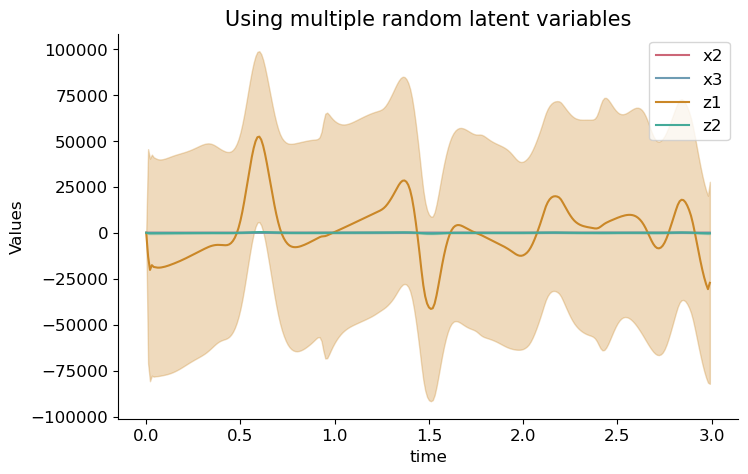

In [164]:
old_name = names[1]
new_name = names[2]

data_train[new_name] = data_train[old_name].copy()
data_train[new_name]["z1"] = kalman_train[old_name].states.sel(state_name="z1")
# Add latent variable
pipeline.add_random_variable(
    data_train[new_name], var_name="z2", random_generator=rng1, variance=variance
)
# Run Klman_SEM
kalman_train[new_name] = pipeline.xarray_Kalman_SEM_time_dependent(
    ds=data_train[new_name],
    observation_variables=["x2", "x3"],
    state_variables=["x2", "x3", "z1", "z2"],
    nb_iter_SEM=nb_iter_SEM,
    variance_obs_comp=0.0001,
    sigma = sigma
)

fig, ax = plt.subplots(1, 1)
for var in kalman_train[new_name].state_name:
    plot_state_with_probability(
        ax=ax,
        x_value=kalman_train[new_name].time,
        state=kalman_train[new_name].states.sel(state_name=var),
        prob=kalman_train[new_name].covariance.sel(state_name=var, state_name_copy=var),
        line_kwargs={"label": var.values},
    )

ax.legend()
# ax.set_xlim((0, 2))
ax.set_xlabel("time")
ax.set_ylabel("Values")
ax.set_title("Using multiple random latent variables");

#### 3 latent variables

In [165]:
# old_name = names[2]
# new_name = names[3]

# data_train[new_name] = data_train[old_name].copy()
# data_train[new_name]["z2"] = kalman_train[old_name].states.sel(state_name="z2")
# # Add latent variable
# pipeline.add_random_variable(
#     data_train[new_name], var_name="z3", random_generator=rng1, variance=variance
# )
# # Run Klman_SEM
# kalman_train[new_name] = pipeline.xarray_Kalman_SEM_time_dependent(
#     ds=data_train[new_name],
#     observation_variables=["x2", "x3"],
#     state_variables=["x2", "x3", "z1", "z2", "z3"],
#     nb_iter_SEM=nb_iter_SEM,
#     variance_obs_comp=0.0001,
#     sigma = sigma
# )

# fig, ax = plt.subplots(1, 1)
# for var in kalman_train[new_name].state_name:
#     plot_state_with_probability(
#         ax=ax,
#         x_value=kalman_train[new_name].time,
#         state=kalman_train[new_name].states.sel(state_name=var),
#         prob=kalman_train[new_name].covariance.sel(state_name=var, state_name_copy=var),
#         line_kwargs={"label": var.values},
#     )

# ax.legend()
# #ax.set_xlim((0, 2))
# ax.set_xlabel("time")
# ax.set_ylabel("Values")
# ax.set_title("Using multiple random latent variables");

## Test the forecast skill
To test the forecast skill, we will create a test dataset starting from the end of the initial training data_train.

In [166]:
test_initial_condition = np.array(
    [model_result[var].isel(time=-1).values for var in ["x1", "x2", "x3"]]
)
test_initial_condition

array([ 7.54287543,  1.01909002, 32.93193306])

In [167]:
model_result_test = example_models.Lorenz_63_xarray(
    dt=dt,
    time_length=number_loops,
    time_steps=None,
    initial_condition=test_initial_condition,
)

In [168]:
data_test = dict()
kalman_test = kalman_train  # use the trained ``M`` and ``Q`` for the smoother later on
smoother_test = dict()
forecast_test = dict()

Create the test dataset with newly initialized latent varibables

Make sure to swap the random number generator between here and the initialization before to check if it still works fine.

It is sufficient here to only apply the Kalman smoother to the dataset in order to get proper results, as ``M`` and ``Q`` were trained on the period before.

In [169]:
"""0 Latent"""

new_name = names[0]
data_test[new_name] = model_result_test.copy()

"""1 Latent"""
old_name = names[0]
new_name = names[1]
# copy dataset
data_test[new_name] = data_test[old_name].copy()
# Add latent variable
pipeline.add_random_variable(
    data_test[new_name], var_name="z1", random_generator=rng3, variance=variance
)

"""2 Latent"""
old_name = names[1]
new_name = names[2]
# copy dataset
data_test[new_name] = data_test[old_name].copy()
data_test[new_name]["z1"] = data_test[old_name]["z1"]
# Add latent variable
pipeline.add_random_variable(
    data_test[new_name], var_name="z2", random_generator=rng4, variance=variance
)


# # """3 Latent"""
# # old_name = names[2]
# # new_name = names[3]
# # # copy dataset
# # data_test[new_name] = data_test[old_name].copy()
# # data_test[new_name]["z2"] = data_test[old_name].states.sel(state_name="z2")
# # # Add latent variable
# # pipeline.add_random_variable(
# #     data_test[new_name], var_name="z3", random_generator=rng1, variance=variance
# # )


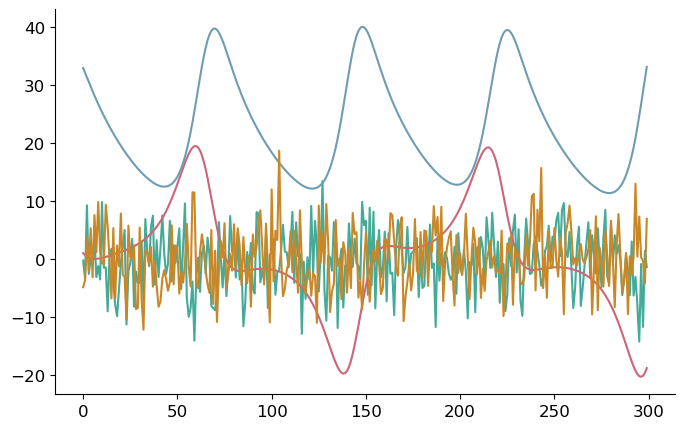

In [170]:
plt.plot(data_test[names[2]].x2, label="x2")
plt.plot(data_test[names[2]].x3, label="x3")
plt.plot(data_test[names[2]].z1, label="z1")
plt.plot(data_test[names[2]].z2, label="z2", zorder=0)

Perform Kalman smoother using the last timestep as start.
The ``M`` and ``Q`` Matrices from the ``Kalman_SEM`` are used.

In [171]:
idx = -1
"""0 Latent"""
observation_variables = ["x2", "x3"]
state_variables = ["x2", "x3"]
H, R = pipeline._input_matrices_H_R_from_n_p(
    n=len(state_variables), p=len(observation_variables)
)
smoother_test[names[0]] = pipeline.xarray_Kalman_smoother_time_dependent(
    ds=data_test[names[0]],
    state_variables=state_variables,
    observation_variables=observation_variables,
    initial_covariance_matrix=kalman_test[names[0]].covariance.isel(time=idx),
    M=kalman_test[names[0]].M.values,
    Q=kalman_test[names[0]].Q.values,
    H=H,
    R=R,
    estimation_idx=idx,
    dim="time",
)

"""1 Latent"""
observation_variables = ["x2", "x3"]
state_variables = ["x2", "x3", "z1"]
H, R = pipeline._input_matrices_H_R_from_n_p(
    n=len(state_variables), p=len(observation_variables)
)
smoother_test[names[1]] = pipeline.xarray_Kalman_smoother_time_dependent(
    ds=data_test[names[1]],
    state_variables=state_variables,
    observation_variables=observation_variables,
    initial_covariance_matrix=kalman_test[names[1]].covariance.isel(time=idx),
    M=kalman_test[names[1]].M.values,
    Q=kalman_test[names[1]].Q.values,
    H=H,
    R=R,
    estimation_idx=idx,
    dim="time",
)

"""2 Latent"""
observation_variables = ["x2", "x3"]
state_variables = ["x2", "x3", "z1", "z2"]
H, R = pipeline._input_matrices_H_R_from_n_p(
    n=len(state_variables), p=len(observation_variables)
)
smoother_test[names[2]] = pipeline.xarray_Kalman_smoother_time_dependent(
    ds=data_test[names[2]],
    state_variables=state_variables,
    observation_variables=observation_variables,
    initial_covariance_matrix=kalman_test[names[2]].covariance.isel(time=idx),
    M=kalman_test[names[2]].M.values,
    Q=kalman_test[names[2]].Q.values,
    H=H,
    R=R,
    estimation_idx=idx,
    dim="time",
)

'''
# """3 Latent"""
# observation_variables = ["x2", "x3"]
# state_variables=["x2", "x3", "z1", "z2", "z3"]

# H, R = pipeline._input_matrices_H_R_from_n_p(n=len(state_variables), p=len(observation_variables))
# smoother_test[names[3]] = pipeline.xarray_Kalman_smoother_time_dependent(
#     ds=data_test[names[2]],
#     state_variables=state_variables,
#     observation_variables=observation_variables,
#     initial_covariance_matrix=kalman_test[names[2]].covariance.isel(time=idx),
#     M=kalman_test[names[2]].M.values,
#     Q=kalman_test[names[2]].Q.values,
#     H=H,
#     R=R,
#     estimation_idx=idx,
#     dim="time",
# )
''';

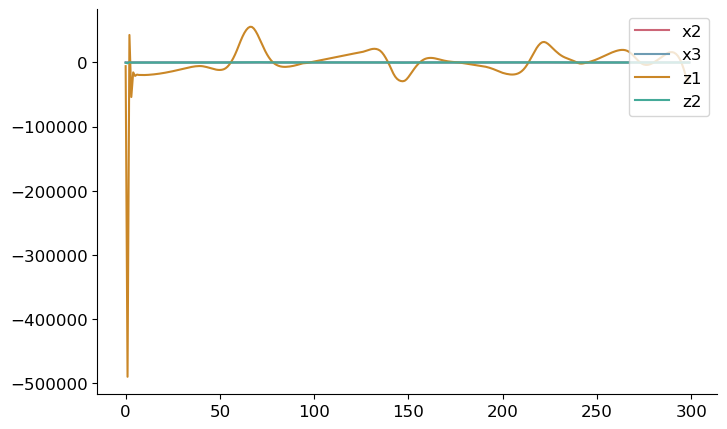

In [172]:
plt.plot(smoother_test[names[2]].state_smooth, label= smoother_test[names[2]].state_name.values)
plt.legend()

Now create the forcast of the system and compute the RMSE and coverage_prbability

In [173]:
forecast_test = dict()
for nb_latent in names:
    forecast_test[nb_latent] = pipeline.forcast_from_kalman(
        ds_kalman_SEM=kalman_test[nb_latent],
        ds_state_covariance=smoother_test[nb_latent],
        state_var_name="state_smooth",
        covariance_var_name="covariance_smooth",
        forecast_length = forecast_length,
    )

Text(0.5, 0, 'Time')

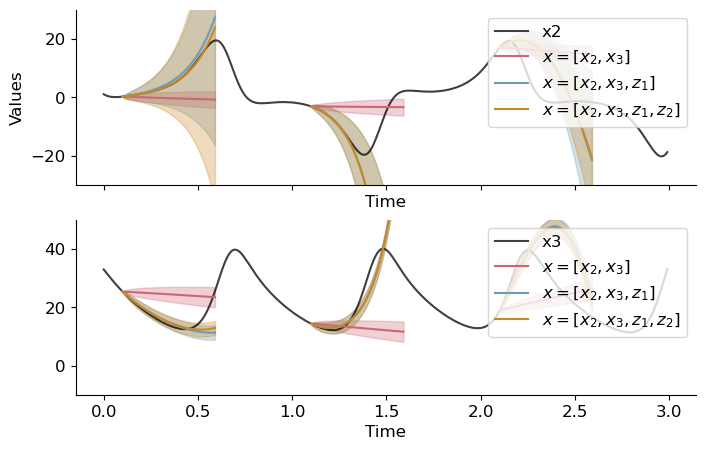

In [174]:
varibales_to_plot = ["x2", "x3"]
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
axs = axs.flatten()

# plot x2
state = "x2"
axs_idx = 0
axs[axs_idx].plot(
    model_result_test.time,
    model_result_test[state],
    color="k",
    alpha=0.75,
    label=state,
)


for (key, ds), color in zip(forecast_test.items(), colors[0:len(forecast_test)]):
    for idx, start_time in enumerate(start_times):
        if idx == 0:
            line_kwargs = dict(color=color, label=key)
        else:
            line_kwargs = dict(color=color)
        plot_state_with_probability(
            ax=axs[axs_idx],
            x_value=start_time + ds.horizon * dt,
            state=ds.states.sel(state_name=state).sel(time=start_time, method = "nearest"),
            prob=ds.covariance.sel(state_name=state, state_name_copy=state).sel(
                time=start_time, method = "nearest"
            ),
            line_kwargs=line_kwargs,
            stds=0.64,
        )

# plot x3
state = "x3"
axs_idx = 1
axs[axs_idx].plot(
    model_result_test.time,
    model_result_test[state],
    color="k",
    alpha=0.75,
    label=state,
)


for (key, ds), color in zip(forecast_test.items(), colors[0:len(forecast_test)]):
    for idx, start_time in enumerate(start_times):
        if idx == 0:
            line_kwargs = dict(color=color, label=key)
        else:
            line_kwargs = dict(color=color)
        plot_state_with_probability(
            ax=axs[axs_idx],
            x_value=start_time + ds.horizon * dt,
            state=ds.states.sel(state_name=state).sel(time=start_time, method = "nearest"),
            prob=ds.covariance.sel(state_name=state, state_name_copy=state).sel(
                time=start_time, method = "nearest"
            ),
            line_kwargs=line_kwargs,
            stds=0.64,
        )


axs[0].legend()
axs[1].legend()
axs[0].set_ylim(-30, 30)
axs[1].set_ylim(-10, 50)
axs[0].set_ylabel("Values")
axs[0].set_xlabel("Time")
axs[1].set_xlabel("Time")

### Create the perfect forecast of the original model data

In [175]:
model_standard = pipeline.to_standard_dataset(ds=model_result_test)
perfect = pipeline.perfect_forcast(model_standard, forecast_length=forecast_length)

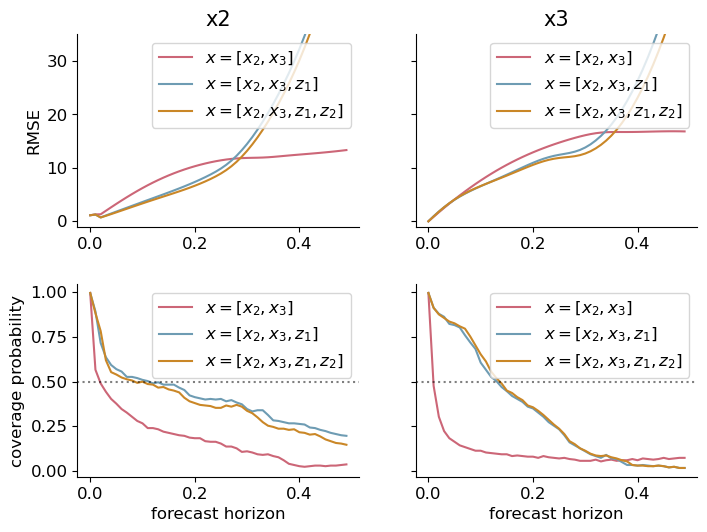

In [176]:
states_to_plot = ["x2","x3"]
fig = plt.figure()
subfigs = subfigs = fig.subfigures(ncols = 1, nrows = 2)

axs_rmse = subfigs[0].subplots(ncols = 2, nrows = 1, sharex = True, sharey = True)
axs_covp = subfigs[1].subplots(ncols = 2, nrows = 1, sharex = True, sharey = True)



for key in names:
    for idx, state in enumerate(states_to_plot):        
        cover_prob_ = xarray_coverage_prob(
            x=forecast_test[key].states.sel(state_name=state),
            P=forecast_test[key].covariance.sel(state_name=state, state_name_copy=state),
            y=perfect.states.sel(state_name=state),
            stds = 0.64,
            dim = "time",
        )
        rmse_ = xarray_RMSE(
            x = forecast_test[key].states.sel(state_name=state),
            y = perfect.states.sel(state_name=state),
            dim = "time",
        )

        # plot rmse:
        axs_rmse[idx].plot(perfect.horizon * dt, rmse_, label = key)
        axs_rmse[idx].set_title(state)
        # plot rmse:
        axs_covp[idx].plot(perfect.horizon * dt, cover_prob_, label = key)
        axs_covp[idx].set_xlabel("forecast horizon")
        # plt.plot(perfect.horizon * dt, 20 * cover_prob, label=key)
        # plt.plot(perfect.horizon * dt, rmse_, label=key)
axs_rmse[0].set_ylabel("RMSE")
axs_covp[0].set_ylabel("coverage probability")

for ax in axs_rmse:
    ax.legend()
    ax.set_ylim((-1,35))
for ax in axs_covp:
    ax.axhline(0.5, color = "k", alpha = 0.5, linestyle = ":")
    ax.legend()


# Write a function that takes in the dict of dataset 


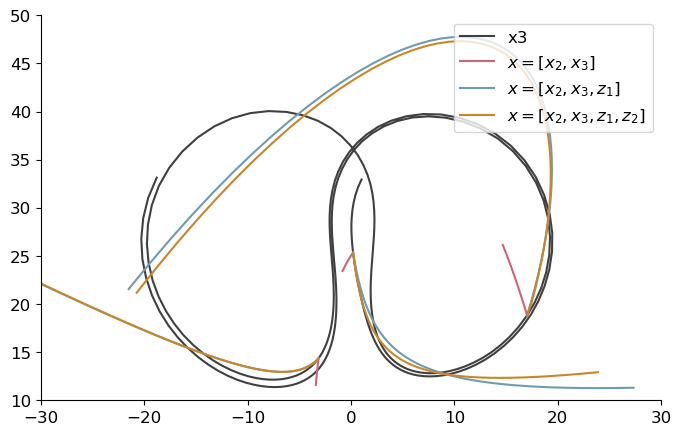

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(
    model_result_test["x2"],
    model_result_test["x3"],
    color="k",
    alpha=0.75,
    label=state,
)


for (key, ds), color in zip(forecast_test.items(), colors[0:len(forecast_test)]):
    for idx, start_time in enumerate(start_times):
        if idx == 0:
            line_kwargs = dict(color=color, label=key)
        else:
            line_kwargs = dict(color=color)
        ax.plot(
            ds.states.sel(state_name="x2").sel(time=start_time, method = "nearest"),
            ds.states.sel(state_name="x3").sel(time=start_time, method = "nearest"),
            **line_kwargs
            )

ax.set_xlim([-30,30])
ax.set_ylim([10,50])
ax.legend()

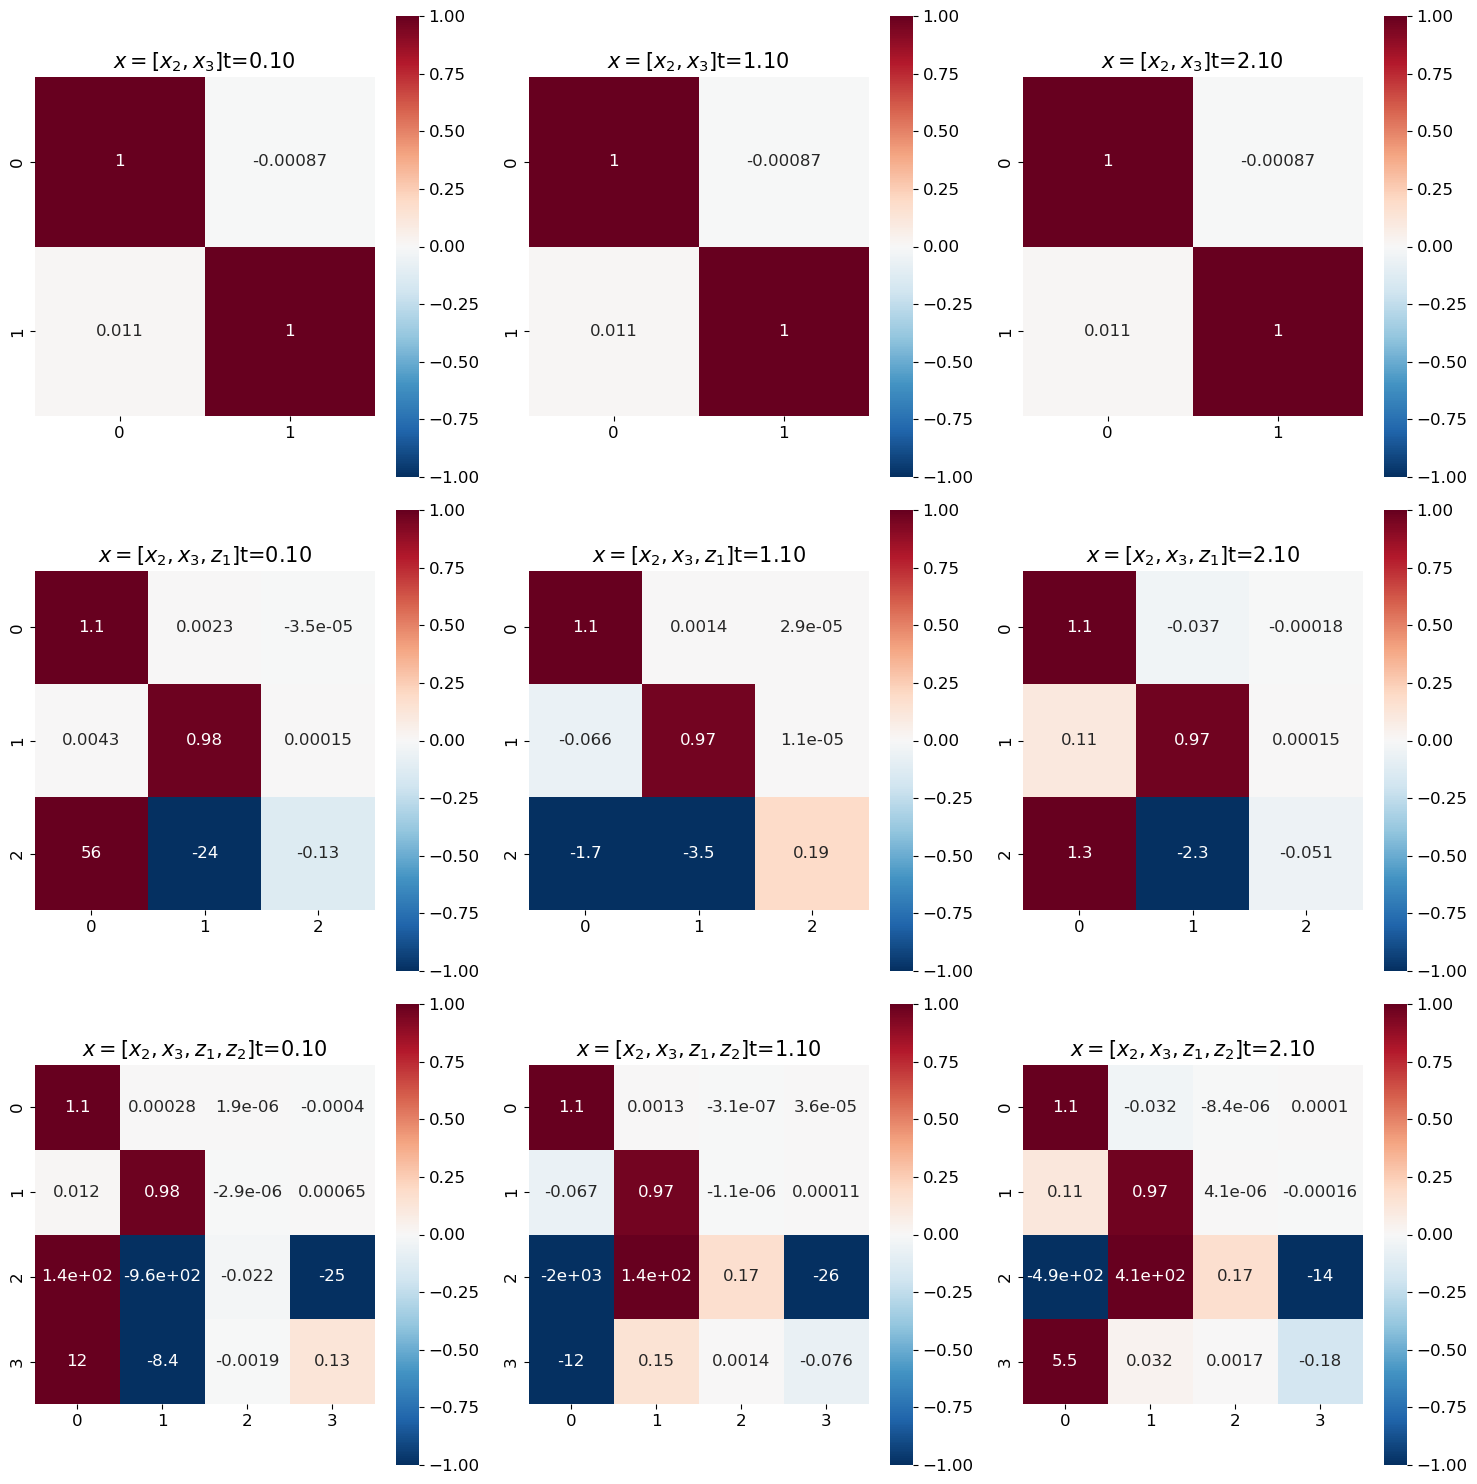

In [178]:
import seaborn as sns
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(15, 15))
for idx, (key, ds) in enumerate(forecast_test.items()) :
    ax = axs[idx]
    for j, start_time in enumerate(start_times):
        sns.heatmap(
            ds.M.sel(time = start_time, method = "nearest"),
            ax = ax[j],
            cmap = "RdBu_r", vmin = -1, vmax = 1,
            square = True,
            annot=True
            )
        ax[j].set_title(key + f"t={start_time:.2f}")    

fig.tight_layout()
